<a href="https://colab.research.google.com/github/Sawroyl/L6AI/blob/main/worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install keras tensorflow

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Manual Gradient Calculation in Numpy

In [ ]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
  return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
  return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
  x -= learning_rate * gradient(x)
  print(f"x: {x}, f(x): {f(x)}")

x: 4.0, f(x): 16.0
x: 3.2, f(x): 10.240000000000002
x: 2.56, f(x): 6.5536
x: 2.048, f(x): 4.194304
x: 1.6384, f(x): 2.68435456
x: 1.31072, f(x): 1.7179869184000003
x: 1.0485760000000002, f(x): 1.0995116277760004
x: 0.8388608000000002, f(x): 0.7036874417766403
x: 0.6710886400000001, f(x): 0.45035996273704976
x: 0.5368709120000001, f(x): 0.2882303761517119


Automatic Gradient Computation using Keras

In [ ]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
  y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


 Matrix Multiplication Speed (Numpy vs. Tensorflow on GPU)

In [ ]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time()- start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time()- start)

NumPy Time: 0.11670851707458496
TensorFlow Time: 0.19131231307983398


 Implementation of Activation Function with Keras

In [ ]:
from tensorflow.keras.layers import Dense, sigmoid
layer = Dense(64, activation='sigmoid')

ImportError: cannot import name 'sigmoid' from 'tensorflow.keras.layers' (/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/layers/__init__.py)

ManuallyTrainingNetworkinNumpy.

In [ ]:
for epoch in range(10):
 # Forwardpass
 y_pred = np.dot(x_train ,weights)
 # Computeloss
 loss = np.mean((y_pred- y_train)**2)
 # Computegradientsmanually
 gradients = 2 * np.dot(x_train.T,(y_pred-y_train))/len(x_train)
 # Updateweights
 weights-=learning_rate*gradients

NameError: name 'x_train' is not defined

Keras training in one line

In [ ]:
 model.fit(x_train,y_train,epochs=10,batch_size=32)

NameError: name 'model' is not defined

 Layers in Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model =Sequential([
  Dense(64,activation='relu',input_shape=(784,)),
  Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Implementing SGD in Numpy

In [ ]:
learning_rate =0.01
weights=np.random.randn(3,3)
for _ in range(100): #Training loop
  gradient=np.random.randn(3,3)#Fake gradient for illustration
  weights-=learning_rate*gradient

In Keras

In [ ]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01)

 3 <b> Understanding Fully Connected Layers </b>

1. Dense Class in Keras:

Syntax of Dense layer

In [ ]:
from tensorflow.keras.layers import Dense
layer = Dense(units, activation=None, use_bias=True, kernel_initializer="glorot_uniform")

A Dense Layer with 64 Neurons and sigmoid Activation

In [ ]:
from tensorflow.keras.layers import Dense
layer = Dense(64, activation="sigmoid") # 64 neurons with sigmoid activation

4 <b> Building a Simple Fully Connected Neural Network in Keras.

1. Load and Preprocess the Data using PIL:

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "dataset/Train/"
test_dir = "dataset/Test/"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1,...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shapes
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()


<b> Reshaping for Keras compatibility:

 Compatibility check for Grayscale Image:

In [ ]:
x_train = x_train.reshape(-1, img_height, img_width, 1)
# Use with Cautions.

Compatibility check for RGB Image:

In [ ]:
x_train = x_train.reshape(-1, img_height, img_width, 3)
 # Use with Cautions.

 <b> Loading and Preprocessing MNIST Handwritten Digit Dataset:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


 2. <b> Build the Model:

1. <b> Sequential API : </b> Example using Sequential API

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(),  # Flatten the 28x28 image to a 784-dimensional vector
        keras.layers.Dense(64, activation="sigmoid"),
        keras.layers.Dense(128, activation="sigmoid"),
        keras.layers.Dense(256, activation="sigmoid"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


In [ ]:
model.summary()

2. <b> Functional API: </b> Example using Functional API

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)

def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Flatten layer
    x = keras.layers.Flatten()(inputs)

    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

# Build the model
functional_model = build_functional_model()
functional_model.summary()


 3. **Compiling and Training the Model:**

 1. Compilation: (specify Loss Function, Optimizer, Metrics )<br>Syntax of model.compile():

In [ ]:
model.compile(
  optimizer = "optimizer",
  loss= "loss_function",
  metrics=["metric1>, <metric2>, ..."]
)

 Example : Compiling the Model

In [ ]:
model.compile(
  optimizer="sgd", #Stochastic Gradient Descent
  loss="categorical_crossentropy", # Loss function for multi-class classification
  metrics=["accuracy"] #Track accuracy during training
)

 2. <b>Training of the Model:</b> <br> Syntax of fit() function

In [ ]:
model.fit(
    x=<input_data>,  # Training input data
    y=<target_labels>,  # Training target labels
    batch_size=<batch_size>,  # Batch size
    epochs=<epochs>,  # Number of epochs
    validation_data=(<x_val>, <y_val>),  # Validation data and labels
    validation_split=<validation_split>,  # Fraction of data to use for validation
    callbacks=[<callback1>, <callback2>, ...],  # List of callbacks
    verbose=<verbose_level>  # Verbosity level (0, 1, or 2)
)


 Example Code for fit()

In [ ]:
batch_size = 128
epochs = 2000

# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),  # Save model at each epoch
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),  # Stop training early if val_loss doesn't improve
]

# Train the model with callbacks and validation split
history = model.fit(
    x_train,  # Training data
    y_train,  # Training labels
    batch_size=batch_size,  # Batch size for training
    epochs=epochs,  # Number of epochs to train the model
    validation_split=0.15,  # Use 15% of the training data for validation
    callbacks=callbacks,  # Callbacks for checkpointing and early stopping
)


 1. <b>Parameters and Setup:

In [ ]:
batch_size = 128
epochs = 2000

2. <b> Callbacks

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

3. <b> Training the Model

In [ ]:
# Train the model with callbacks and validation split
history = model.fit(
    x_train,  # Training data
    y_train,  # Training labels
    batch_size=batch_size,  # Batch size for training
    epochs=epochs,  # Number of epochs to train the model
    validation_split=0.15,  # Use 15% of the training data for validation
    callbacks=callbacks,  # List of callbacks (e.g., ModelCheckpoint, EarlyStopping)
)


4. <b> History Object

Sample Code for visualizing Model’s Training Progress.

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()


4. <b> Evaluate the Model

Syntax for model.evaluation()

In [ ]:
model.evaluate(x=None,y=None,batch_size=None,verbose=1,sample_weight=None,steps=None, callbacks
  =None,max_queue_size=10,workers=1,use_multiprocessing=False)

Example code for Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

5.<b> Making Predictions with Keras:

Syntax for model.predict()


In [ ]:
model.predict(
    x,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)


 6. <b>Saving and Loading the Model:

1. Saving the Model

In [ ]:
model.save('mnist_fully_connected_model.h5')

2. Loading the Model:

In [ ]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')

 6. <b>Exercise: Building a Fully Connected Network (FCN) for
 Devnagari Digit Classification.

<b> Task 1 : Data Preparation

Loading the Data

 Download the provided folder that contains the Devnagari digits dataset.
 • Use the Python Imaging Library (PIL) to load and read the image files from the dataset.
 • Convert the images into Numpy arrays and normalize them to a range of 0-1.
 • use train folder for training and test for testing.
 • Extract the corresponding labels for each image

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow
from tensorflow.keras.utils import to_categorical

In [ ]:
train_dir = "/content/drive/MyDrive/AI And ML/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI And ML/DevanagariHandwrittenDigitDataset/Test"

img_height, img_width = 28, 28

def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder))
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L")
      img = img.resize((img_width, img_height))
      img = np.array(img) / 255.0
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)

In [ ]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

Reshape and One-Hot Encoding Labels

Training set: (17010, 28, 28, 1), Labels: (17010, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


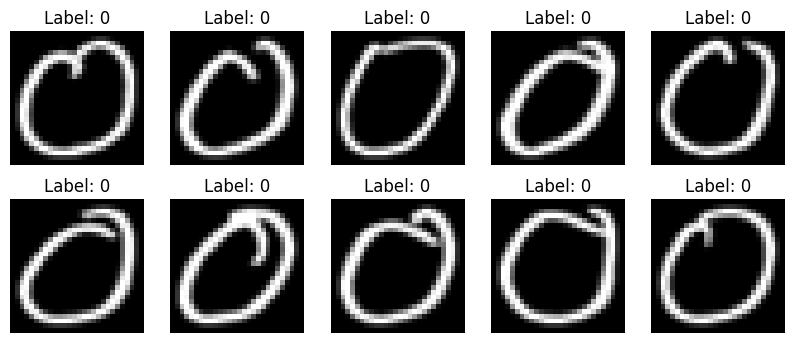

In [ ]:
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

# Task 2: Build the FCN Model

Model Architecture

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='sigmoid'),  # First hidden layer
    Dense(128, activation='sigmoid'),  # Second hidden layer
    Dense(256, activation='sigmoid'),  # Third hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [ ]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9989 - loss: 0.0088 - val_accuracy: 0.0000e+00 - val_loss: 8.0304
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 2.9394e-04 - val_loss: 8.0045
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9993 - loss: 0.0065 - val_accuracy: 5.8789e-04 - val_loss: 8.1563
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - loss: 0.0055 - val_accuracy: 2.9394e-04 - val_loss: 8.3575
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 0.0048 - val_accuracy: 5.8789e-04 - val_loss: 8.4079
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 5.8789e-04 - val_loss: 8.5842
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9996 - loss: 0.0037 - val_accuracy: 2.9394e-04 - val_loss: 8.5868
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9994 - los

# Task 5: Evaluate the Model

Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7917 - loss: 1.8478
Test accuracy: 0.7917


# Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.



In [ ]:
model.save('devnagari_fcn.h5')

loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(x_test, y_test)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9642 - loss: 0.2438


[1.8478256464004517, 0.7916666865348816]

# Task 7: Predictions

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().


In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

#displaying first 10 predictions
for i in range(10):
    print(f"Predicted: {predicted_labels[i]}, Actual: {np.argmax(y_test[i])}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


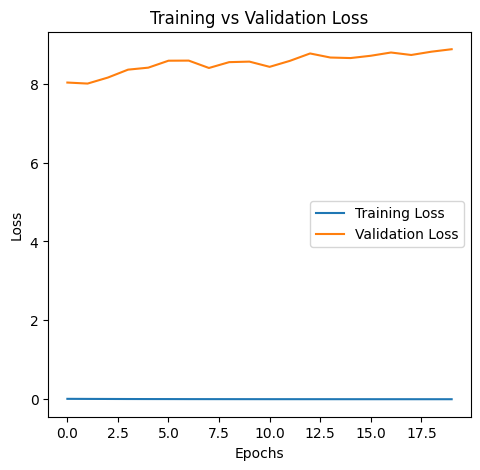

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()